In [4]:
import os
import pandas as pd
import numpy as np
from sklearn import preprocessing,metrics 
from IPython.core.display import HTML
pd.set_option("display.max_columns",75)
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import linear_model,svm
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve


In [5]:
df = pd.read_csv('/home/sandeep/Desktop/TVS Credit E.P.I.C. Analytics Case Study/case2.csv',low_memory=False,skiprows=0)

In [6]:
df.head(0)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36


In [7]:
data_with_loanstatus_sliced = df[(df['V36']=="Fully Paid") | (df['V36']=="Charged Off")]
di = {"Fully Paid":0, "Charged Off":1}   #converting target variable to boolean
Dataset_withBoolTarget= data_with_loanstatus_sliced.replace({"V36": di})

In [8]:
Dataset_withBoolTarget['V36'].value_counts()

Series([], Name: V36, dtype: int64)

In [9]:
Dataset_withBoolTarget['V36'].value_counts()
print("Current shape of dataset :",Dataset_withBoolTarget.shape)
Dataset_withBoolTarget.head(3)

Current shape of dataset : (0, 36)


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33,V34,V35,V36


In [10]:
col = ['V23','V24','V32','V18']
df = df.drop(labels = col, axis = 1) 
print("Current shape of dataset :",df.shape)

Current shape of dataset : (200000, 32)


In [11]:
features = ['V2','V3','V4','V5', "V6", "V7", "V8", "V9","V10",
            "V11","V12","V13","V14",
            "V15","V16",'V20','V21','V22','V25','V26','V27','V28','V29',
           'V30','V31','V33','V34','V35','V36'] #selecting final features
Final_data = df[features]
Final_data= Final_data.reset_index(drop=True)
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (200000, 29)


In [12]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V19,V20,V21,V22,V25,V26,V27,V28,V29,V30,V31,V33,V34,V35,V36
0,cust_0,0,0,0.0,CLR,0.0,0,0,0.0,0,0,0,0.000000,0,0,0,CD_M_0245,MBL,70.0,SELF,MALE,8990,43,Y,NaN,NaN,NaN,NaN,10,12TH,OWNED,1
1,cust_1,0,0,0.0,CLR,0.0,0,0,0.0,0,0,0,0.000000,0,0,0,CD_M_0245,MBL,70.0,SELF,MALE,17990,39,Y,0.0,0.0,0.0,75.0,10,12TH,OWNED,0
2,cust_2,1,1,1.0,BOU,23.0,1,23,0.0,0,0,0,0.142653,1,0,0,CD_M_0245,MBL,70.0,SELF,MALE,17990,39,Y,0.0,0.0,0.0,75.0,10,12TH,OWNED,0
3,cust_3,1,0,0.5,CLR,21.5,2,43,0.0,0,0,1,0.498753,2,0,0,CD_M_0245,MBL,70.0,SELF,MALE,17990,39,Y,0.0,0.0,0.0,78.0,10,12TH,OWNED,0
4,cust_4,0,0,0.0,CLR,0.0,0,0,0.0,0,0,0,0.332779,0,0,0,CD_M_0020,REF,90.0,SELF,MALE,24000,23,Y,0.0,0.0,0.0,18.0,10,GRADUATE,OWNED,0


In [13]:
Final_data['V34'] = Final_data['V34'].map({'POST-GRADUATE':5,'GRADUATE':4,'UNDER GRADUATE':3,'12TH':2,'SSC':1,'OTHERS':0})

In [14]:
Final_data['V21'] = Final_data['V21'].map({'SELF':1,'SAL':0})

In [15]:
Final_data['V22'] = Final_data['V22'].map({'MALE':1,'FEMALE':0})
Final_data['V35'] = Final_data['V35'].map({'OWNED':1,'RENT':0})
Final_data['V27'] = Final_data['V27'].map({'Y':1,'N':0})

In [16]:
Final_data['V5'] = Final_data['V5'].map({'CLR':1,'BOU':0})

In [17]:
Final_data.head(10)

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V20,V21,V22,V25,V26,V27,V28,V29,V30,V31,V33,V34,V35,V36
0,0,0,0.0,1,0.0,0,0,0.000000,0,0,0,0.000000,0,0,0,70.0,1,1,8990,43,1,NaN,NaN,NaN,NaN,10,2.0,1,1
1,0,0,0.0,1,0.0,0,0,0.000000,0,0,0,0.000000,0,0,0,70.0,1,1,17990,39,1,0.0,0.0,0.0,75.0,10,2.0,1,0
2,1,1,1.0,0,23.0,1,23,0.000000,0,0,0,0.142653,1,0,0,70.0,1,1,17990,39,1,0.0,0.0,0.0,75.0,10,2.0,1,0
3,1,0,0.5,1,21.5,2,43,0.000000,0,0,1,0.498753,2,0,0,70.0,1,1,17990,39,1,0.0,0.0,0.0,78.0,10,2.0,1,0
4,0,0,0.0,1,0.0,0,0,0.000000,0,0,0,0.332779,0,0,0,90.0,1,1,24000,23,1,0.0,0.0,0.0,18.0,10,4.0,1,0
5,1,1,1.0,0,13.0,0,13,0.199601,0,0,0,0.199601,1,0,0,90.0,1,1,24000,23,1,0.0,0.0,0.0,19.0,10,4.0,1,0
6,3,3,1.0,0,10.0,1,20,0.166389,0,0,0,0.332779,2,0,0,90.0,1,1,24000,23,1,0.0,0.0,0.0,21.0,10,4.0,1,0
7,0,0,0.0,1,0.0,0,0,0.000000,0,0,0,0.664452,0,0,0,70.0,1,1,13990,31,1,0.0,0.0,0.0,52.0,10,3.0,1,1
8,0,0,0.0,1,0.0,0,0,0.497512,1,1,0,0.498753,1,0,1,70.0,1,1,13990,31,1,0.0,0.0,0.0,53.0,10,3.0,1,0
9,2,0,0.0,1,0.0,0,0,0.199601,1,0,1,0.399202,2,0,0,70.0,1,1,13990,31,1,0.0,0.0,0.0,56.0,10,3.0,1,1


In [18]:
Final_data.fillna(Final_data.mean(),inplace = True)
HTML(Final_data.tail().to_html())
print("Current shape of dataset :",Final_data.shape)

Current shape of dataset : (200000, 29)


In [19]:
scl = preprocessing.StandardScaler() #instance of preprocessing
fields = Final_data.columns.values[:-1]
data_clean = pd.DataFrame(scl.fit_transform(Final_data[fields]), columns = fields)
data_clean['V36'] = Final_data['V36']
data_clean['V36'].value_counts()

0    167153
1     32847
Name: V36, dtype: int64

In [20]:

loanstatus_0 = data_clean[data_clean["V36"]==0]
loanstatus_1 = data_clean[data_clean["V36"]==1]
subset_of_loanstatus_0 = loanstatus_0.sample(n=5500)
subset_of_loanstatus_1 = loanstatus_1.sample(n=5500)
data_clean = pd.concat([subset_of_loanstatus_1, subset_of_loanstatus_0])
data_clean = data_clean.sample(frac=1).reset_index(drop=True)
print("Current shape of dataset :",data_clean.shape)
data_clean.head()

Current shape of dataset : (11000, 29)


,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V20,V21,V22,V25,V26,V27,V28,V29,V30,V31,V33,V34,V35,V36
0,1.813334,2.211768,-0.447642,-1.041772,1.17577,2.406091,2.671949,-0.556564,-0.351773,-0.304710,2.392519,2.271311,-0.842405,-0.060922,-0.240284,-0.373172,0.774208,0.456389,-0.261936,-1.067152,-0.81716,-9.021218e-17,5.977846e-17,0.000000,-2.318841e-16,-0.671855,1.232246,0.412096,0
1,-0.965778,-0.724108,-0.447642,0.959903,-0.86945,-0.729361,-0.690779,0.696357,1.948000,3.281805,-0.537577,1.116189,0.058168,-0.060922,-0.240284,-0.344096,0.774208,-2.191111,-0.998134,1.199282,-0.81716,-2.314563e-01,-4.075282e-01,-0.331612,-9.307720e-01,-0.241741,0.474943,0.412096,1
2,-0.965778,-0.724108,-0.447642,0.959903,-0.86945,-0.729361,-0.690779,-0.556564,-0.351773,-0.304710,-0.537577,0.419883,-0.842405,-0.060922,-0.240284,1.428239,0.774208,0.456389,-0.813395,-0.047256,-0.81716,-9.021218e-17,5.977846e-17,0.000000,-2.318841e-16,-1.962198,-0.282360,0.412096,0
3,-0.965778,-0.724108,-0.447642,0.959903,-0.86945,-0.729361,-0.690779,-0.556564,-0.351773,-0.304710,-0.537577,-0.621545,-0.842405,-0.060922,-0.240284,-0.604461,0.774208,0.456389,0.059749,-0.047256,-0.81716,-9.021218e-17,5.977846e-17,0.000000,-2.318841e-16,0.618487,1.232246,0.412096,1
4,-0.039408,-0.724108,-0.447642,0.959903,-0.86945,-0.729361,-0.690779,-0.556564,-0.351773,-0.304710,-0.537577,-1.198385,0.058168,-0.060922,-0.240284,-0.604461,0.774208,0.456389,-0.491710,-0.613865,1.22375,-9.021218e-17,5.977846e-17,0.000000,-1.224485e+00,0.618487,1.232246,-2.426618,1


In [21]:
data_clean.corr()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V20,V21,V22,V25,V26,V27,V28,V29,V30,V31,V33,V34,V35,V36
V2,1.000000,0.871354,0.342461,-0.780318,0.600749,0.686124,0.657587,0.187915,-0.088466,-0.176588,0.507941,0.201858,0.588384,-0.002342,-0.134673,0.028730,0.005057,-0.004820,0.017678,-0.006322,0.071931,0.006886,0.040775,0.014651,-0.021551,-0.019325,-0.030812,-0.032808,-0.374187
V3,0.871354,1.000000,0.294363,-0.774913,0.517895,0.679850,0.651412,0.125419,-0.124133,-0.195671,0.445329,0.203173,0.507347,-0.007635,-0.163097,0.032071,0.005602,-0.010239,0.024617,-0.006003,0.082150,0.009183,0.039210,0.016196,-0.024360,-0.022279,-0.025901,-0.036648,-0.346064
V4,0.342461,0.294363,1.000000,-0.318886,0.443269,0.367293,0.381191,0.043757,-0.023796,-0.074756,0.197150,0.025441,0.245290,-0.008426,-0.056533,-0.002538,0.030164,-0.006618,0.003402,-0.017498,0.043643,-0.014986,-0.015757,-0.019523,-0.032334,-0.004421,-0.012286,-0.042343,-0.328995
V5,-0.780318,-0.774913,-0.318886,1.000000,-0.581313,-0.521833,-0.503241,-0.167229,0.105920,0.236774,-0.357745,-0.038335,-0.471809,0.002323,0.210111,-0.031700,-0.015401,0.007146,-0.019455,0.014818,-0.030220,-0.008010,-0.031903,-0.014137,0.037197,0.026202,0.033380,0.033431,0.385480
V6,0.600749,0.517895,0.443269,-0.581313,1.000000,0.756970,0.812169,0.038497,-0.072715,-0.141548,0.394912,0.030145,0.444401,-0.005009,-0.111628,0.020352,0.030639,-0.013033,0.005092,-0.015016,0.073049,-0.002513,0.023597,0.003209,-0.029762,-0.008352,-0.037271,-0.012435,-0.590151
V7,0.686124,0.679850,0.367293,-0.521833,0.756970,1.000000,0.950024,0.120758,-0.077739,-0.126769,0.520781,0.264977,0.514250,-0.007406,-0.100993,0.017223,0.007276,-0.028924,0.005416,-0.003355,0.127714,0.000182,0.020644,0.002561,-0.015731,0.008211,-0.032564,-0.022882,-0.508845
V8,0.657587,0.651412,0.381191,-0.503241,0.812169,0.950024,1.000000,0.043492,-0.077269,-0.127728,0.521251,0.254866,0.522492,-0.009923,-0.097310,0.013874,0.018888,-0.026716,0.006494,-0.009643,0.125419,-0.000836,0.022053,0.000707,-0.014242,0.003682,-0.030786,-0.013925,-0.486357
V9,0.187915,0.125419,0.043757,-0.167229,0.038497,0.120758,0.043492,1.000000,0.485041,0.432319,-0.015333,0.008932,0.315603,-0.006823,0.399151,-0.018834,-0.030662,-0.011194,-0.015221,-0.009188,0.003110,0.006188,0.005454,0.009163,-0.001224,0.012012,-0.023666,0.010763,-0.002259
V10,-0.088466,-0.124133,-0.023796,0.105920,-0.072715,-0.077739,-0.077269,0.485041,1.000000,0.780771,0.016420,-0.108895,0.446798,0.018931,0.637409,-0.018519,-0.036562,0.003250,0.004092,0.007705,0.041162,0.024322,0.016046,0.018824,0.022513,0.021805,-0.008069,0.021587,0.120192
V11,-0.176588,-0.195671,-0.074756,0.236774,-0.141548,-0.126769,-0.127728,0.432319,0.780771,1.000000,-0.042150,-0.089482,0.239577,0.008028,0.772739,-0.022642,-0.031121,0.001018,-0.017737,0.004256,0.012240,0.006653,0.010678,0.007955,0.019354,0.016682,0.001342,0.023630,0.164654


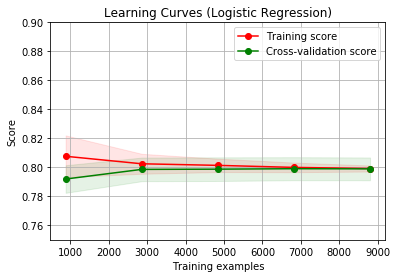

In [22]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()
    
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

X, y = data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values
title = "Learning Curves (Logistic Regression)"
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
estimator = linear_model.LogisticRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.75, 0.90), cv=cv, n_jobs=4)
plt.show()


In [23]:
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right")

In [24]:
import itertools
from sklearn.metrics import confusion_matrix
def plot_confusion_matrix(model, normalize=False): # This function prints and plots the confusion matrix.
    cm = confusion_matrix(y_test, model, labels=[0, 1])
    classes=["Will Pay", "Will Default"]
    cmap = plt.cm.Blues
    title = "Confusion Matrix"
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=3)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:

X_train, X_test, y_train, y_test = train_test_split(data_clean.iloc[:,:-1], data_clean.iloc[:,-1], test_size=0.2, random_state=42)
bs_train, bs_test = train_test_split(data_clean, test_size = 0.2, random_state=42)

In [26]:
X_train.head()

,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V20,V21,V22,V25,V26,V27,V28,V29,V30,V31,V33,V34,V35
10735,-0.039408,0.009861,-0.447642,-1.041772,-0.869450,-0.729361,-0.690779,-0.556564,-0.351773,-0.30471,-0.537577,0.419883,0.058168,-0.060922,-0.240284,0.180600,0.774208,0.456389,-0.261936,0.745996,-0.81716,-2.314563e-01,-4.075282e-01,-0.331612,-1.224485e+00,1.908829,-1.039663,-2.426618
5937,-0.039408,0.009861,2.639319,-1.041772,1.467944,0.054502,0.270000,-0.556564,-0.351773,-0.30471,-0.537577,-0.621545,0.058168,-0.060922,-0.240284,1.157300,-1.291642,0.456389,-0.262855,-0.953830,1.22375,-2.314563e-01,-4.075282e-01,-0.331612,-8.328676e-01,-0.241741,-1.039663,0.412096
7642,-0.965778,-0.724108,-0.447642,0.959903,-0.869450,-0.729361,-0.690779,-0.556564,-0.351773,-0.30471,-0.537577,-0.041820,-0.842405,-0.060922,-0.240284,-0.888616,0.774208,0.456389,0.840984,-0.387221,-0.81716,-9.021218e-17,5.977846e-17,0.000000,-2.318841e-16,-0.241741,-0.282360,0.412096
3328,-0.039408,0.009861,-0.447642,-1.041772,-0.869450,-0.729361,-0.690779,0.696357,-0.351773,-0.30471,-0.537577,-0.967534,0.058168,-0.060922,-0.240284,-0.605783,-1.291642,0.456389,-0.638766,0.632674,1.22375,-9.021218e-17,5.977846e-17,0.000000,-2.318841e-16,0.618487,0.474943,0.412096
8681,-0.965778,-0.724108,-0.447642,0.959903,-0.869450,-0.729361,-0.690779,-0.556564,-0.351773,-0.30471,-0.537577,1.807299,-0.842405,-0.060922,-0.240284,-0.362599,-1.291642,0.456389,-1.089125,-0.613865,-0.81716,-2.314563e-01,-4.075282e-01,-0.331612,2.440805e-01,-0.241741,1.232246,0.412096


In [27]:
from sklearn.feature_selection import RFE
# create the RFE model and select 3 attributes
clf_LR = linear_model.LogisticRegression(C=1e30)
clf_LR.fit(X_train,y_train)
rfe = RFE(clf_LR, 10)
rfe = rfe.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True  True False  True  True  True  True  True False  True False
  True False False False False False False False False False False False
 False False False False]
[ 1  1  1 10  1  1  1  1  1 19  1  3  1 11 18 12 14 15  6 13  7 16  8  9
  2  5  4 17]


In [28]:
from sklearn.decomposition import PCA 
pca = PCA(n_components=10, whiten=True)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
print('Expected Variance is '+ str(explained_variance))

Expected Variance is [0.17438686 0.13922061 0.09431807 0.05341836 0.05214728 0.04922557
 0.04180232 0.04108226 0.03683883 0.03350668]


In [29]:
features = ['V2','V3','V4','V5', "V6", "V7", "V8", "V9","V10",
            "V11","V12","V13","V14",
            "V15","V16",'V20','V21','V22','V25','V26','V27','V28','V29',
           'V30','V31','V33','V34','V35','V36']
X_train, X_test = X_train[features[:-1]], X_test[features[:-1]]
data_clean = data_clean[features]
print(X_train.shape)
print(data_clean.shape)

(8800, 28)
(11000, 29)


findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


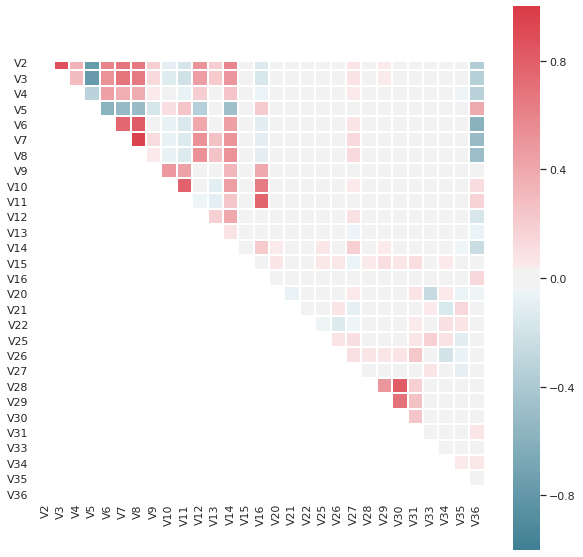

In [30]:
dataViz = data_clean
sns.set_context(context='notebook')
fig, ax = plt.subplots(figsize=(10,10)) 
corr = dataViz.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.tril_indices_from(mask)] = True

cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, cmap=cmap,linewidths=1, vmin=-1, vmax=1, square=True, cbar=True, center=0, ax=ax, mask=mask)

In [31]:
from sklearn.model_selection import learning_curve, RandomizedSearchCV
rf = RandomForestClassifier(criterion='gini', random_state=0)
maxFeatures = range(1,data_clean.shape[1]-1)
param_dist = dict(max_features=maxFeatures)
rand = RandomizedSearchCV(rf, param_dist, cv=10, scoring='accuracy', n_iter=len(maxFeatures), random_state=10)
X=data_clean.iloc[:,:-1].values
y=data_clean.iloc[:,-1].values
rand.fit(X,y)

RandomizedSearchCV(cv=10, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [32]:
randomForest = RandomForestClassifier(bootstrap=True,criterion = "gini",max_features=rand.best_estimator_.max_features,random_state=0 )
randomForest.fit(X_train,y_train)
rfPredict = randomForest.predict(X_test)
rfPredictproba = randomForest.predict_proba(X_test)[:,1] #for ROC curve
rfAccuracy = accuracy_score(y_test,rfPredict)
roc_score = metrics.roc_auc_score(y_test,rfPredict)
print(rfAccuracy)

0.7486363636363637


Text(0, 0.5, 'Normalized Gini Importance')

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


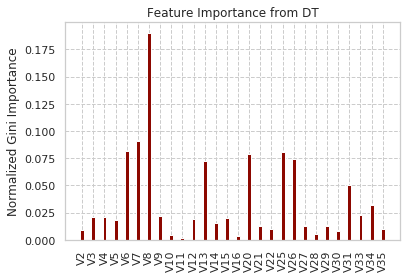

In [33]:
fig, ax = plt.subplots()
width=0.35
ax.bar(np.arange(len(features)-1), randomForest.feature_importances_, width, color='r')
ax.set_xticks(np.arange(len(randomForest.feature_importances_)))
ax.set_xticklabels(X_train.columns.values,rotation=90)
plt.title('Feature Importance from DT')
ax.set_ylabel('Normalized Gini Importance')

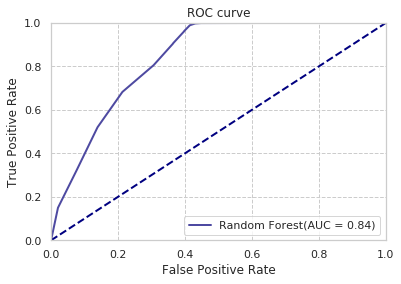

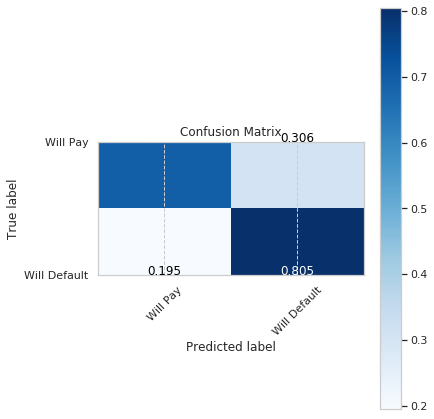

In [34]:
plotAUC(y_test,rfPredictproba, 'Random Forest')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(rfPredict, normalize=True)
plt.show()

In [35]:
from sklearn.model_selection import GridSearchCV
def cross_validation_best_parameters(model, param_grid):
    grid = GridSearchCV(model, param_grid,cv=10, scoring='accuracy')
    X=data_clean.iloc[:,:-1].values
    y=data_clean.iloc[:,-1].values
    grid.fit(X,y)
    return grid.best_score_,grid.best_estimator_
logreg = linear_model.LogisticRegression(random_state=0)
c=[0.001, 0.01, 0.1, 1, 10, 100, 1000]
param_grid = dict(C=c)
Best_Accuracy, Best_classifier = cross_validation_best_parameters(logreg,param_grid)
print("Best accuracy is "+ str(Best_Accuracy))
print(Best_classifier)

Best accuracy is 0.799
LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)


Logistic regression accuracy is  0.7872727272727272


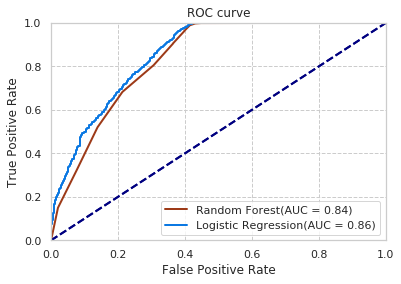

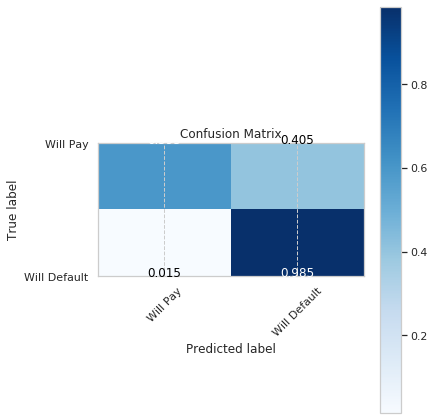

In [36]:
clf_LR = linear_model.LogisticRegression(C=Best_classifier.C)
clf_LR.fit(X_train,y_train)
LR_Predict = clf_LR.predict_proba(X_test)[:,1]
LR_Predict_bin = clf_LR.predict(X_test)
LR_Accuracy = accuracy_score(y_test,LR_Predict.round())
print("Logistic regression accuracy is ",LR_Accuracy)
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(LR_Predict_bin, normalize=True)
plt.show()

In [37]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
num_trees = 100
model = BaggingClassifier(base_estimator=randomForest, n_estimators=num_trees, random_state=seed)
results = model_selection.cross_val_score(model, data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values, cv=kfold)
print(results.mean())

0.7997272727272728


In [38]:
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier
seed = 7
kfold = model_selection.KFold(n_splits=10, random_state=seed)
#num_trees = 100
model = BaggingClassifier(base_estimator=clf_LR, random_state=seed)
results = model_selection.cross_val_score(model, data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values, cv=kfold)
print(results.mean())

0.7984545454545454


0.7881818181818182


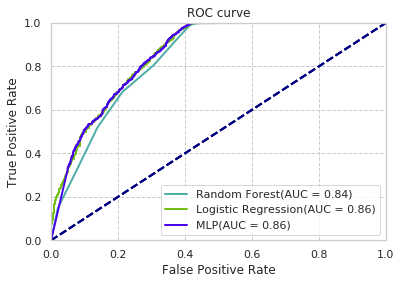

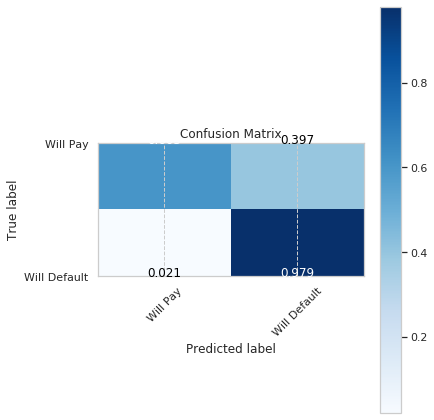

In [39]:
from sklearn.neural_network import MLPClassifier
clf_NN = MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
clf_NN.fit(X_train,y_train)     
predict_NN = clf_NN.predict(X_test)
predictproba_NN = clf_NN.predict_proba(X_test)[:,1]
NNAccuracy = accuracy_score(y_test,predict_NN)
print(NNAccuracy)
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,predictproba_NN,'MLP')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(predict_NN, normalize=True)
plt.show()

In [40]:
from sklearn.model_selection import GridSearchCV
clf_knn = KNeighborsClassifier()
k_range = list(range(35, 50))
param_grid = dict(n_neighbors=k_range)
grid = GridSearchCV(clf_knn, param_grid, cv=10, scoring='accuracy')
grid.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
print(grid.best_params_)
print("---------------")
print(grid.best_estimator_)

{'n_neighbors': 48}
---------------
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=48, p=2,
                     weights='uniform')


 48
KNN accuracy is  0.7572727272727273


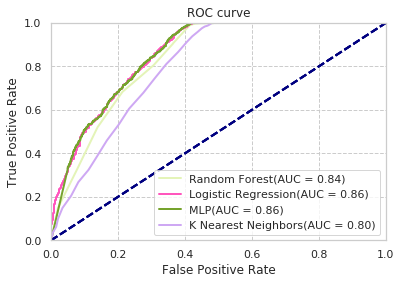

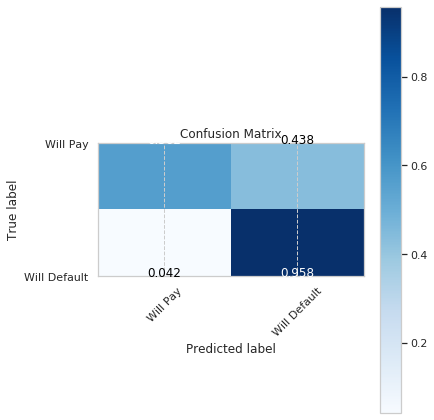

In [41]:
print("",grid.best_params_['n_neighbors'])
clf_knn_final = KNeighborsClassifier(n_neighbors=grid.best_params_['n_neighbors'])   #taking the the best from the above cell and using it to find predictions
clf_knn_final.fit(X_train,y_train)
knn_pred = clf_knn_final.predict(X_test)
knn_predictproba = clf_knn_final.predict_proba(X_test)[:,1]
KNN_Acc = accuracy_score(y_test,knn_pred)
print("KNN accuracy is ",KNN_Acc)
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,predictproba_NN,'MLP')
plotAUC(y_test,knn_predictproba,'K Nearest Neighbors')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(knn_pred, normalize=True)
plt.show()

In [44]:
from sklearn.model_selection import GridSearchCV
clf_svm = svm.SVC()
powers = range(0,5)
cs = [10**i for i in powers]
param_grid = dict(C=cs)
grid = GridSearchCV(clf_svm, param_grid, cv=10, scoring='accuracy')
grid.fit(data_clean.iloc[:,:-1].values, data_clean.iloc[:,-1].values)
print(grid.best_params_)
print("---------------")
print(grid.best_estimator_)

KeyboardInterrupt: 

In [ ]:
clf_svm = svm.SVC(kernel = "rbf", C=grid.best_estimator_.C)
clf_svm.fit(X_train.iloc[:,:],y_train)
predictions_svm = clf_svm.predict(X_test.iloc[:,:])
predictproba_svm = clf_svm.decision_function(X_test.iloc[:,:])
SVM_Accuracy = accuracy_score(y_test,predictions_svm)
print("SVM accuracy is ",SVM_Accuracy)
plotAUC(y_test,predictproba_svm, 'SVM')
plotAUC(y_test,rfPredictproba, 'Random Forest')
plotAUC(y_test,LR_Predict,'Logistic Regression')
plotAUC(y_test,predictproba_NN,'MLP')
plotAUC(y_test,knn_predictproba,'K Nearest Neighbors')
plt.show()
plt.figure(figsize=(6,6))
plot_confusion_matrix(predictions_svm, normalize=True)
plt.show()